# Question 1

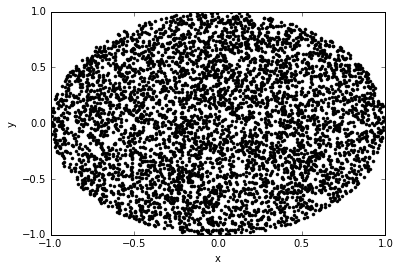

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def inversionSampling(sampleNumber):
    R = []
    Q = []
    N = sampleNumber
    for i in range(N):
        R.append(np.random.uniform(0,1))
        Q.append(np.random.uniform(0,np.pi*2))
    R = np.sqrt(R)
    return np.multiply(np.cos(Q),R),np.multiply(np.sin(Q),R)

X,Y = inversionSampling(5000)

plt.plot(X,Y,'k.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Question 2

Acceptance Rate for p = 1.500000: 0.881800
Acceptance Rate for p = 0.700000: 0.395600


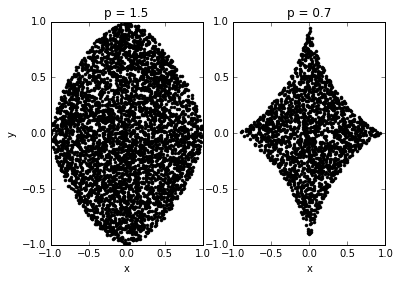

In [18]:
def thresholdMask(x,y,p):
    return np.power(np.power(np.abs(x),p)+np.power(np.abs(y),p),1.0/p) <= 1

def rejectionSampling(p):
    sampleNumber = 5000
    X,Y = inversionSampling(sampleNumber)
    Xmasked = []
    Ymasked = []
    for i in range(sampleNumber):
        if thresholdMask(X[i],Y[i],p):
            Xmasked.append(X[i])
            Ymasked.append(Y[i])
    print 'Acceptance Rate for p = %f: %f' % (p,len(Xmasked)/float(sampleNumber))
    return Xmasked,Ymasked
    
sample1 = rejectionSampling(1.5)
sample2 = rejectionSampling(0.7)

plt.subplot(121)
plt.plot(sample1[0],sample1[1],'k.')
plt.title('p = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(122)
plt.plot(sample2[0],sample2[1],'k.')
plt.title('p = 0.7')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can improve the acceptance rate for p = 0.7 by choosing sampling norm p as 1. Enclosing unit rectangle will have less gap than the gap for p = 2. Therefore, samples will be more likely to be inside unit rectangle for p = 0.7.